In [81]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("train.csv")

In [83]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [84]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [85]:
for col in df.columns :
    print(col ,":",len(df[col].unique()),"categories")

date : 1826 categories
store : 10 categories
item : 50 categories
sales : 213 categories


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [87]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [88]:
parts=df["date"].str.split("-",n=3,expand=True)
df["day"]=parts[2].astype('int')
df["month"]=parts[1].astype('int')
df["year"]=parts[0].astype('int')
df.head()

,date,store,item,sales,day,month,year
0,2013-01-01,1,1,13,1,1,2013
1,2013-01-02,1,1,11,2,1,2013
2,2013-01-03,1,1,14,3,1,2013
3,2013-01-04,1,1,13,4,1,2013
4,2013-01-05,1,1,10,5,1,2013


In [89]:
from datetime import datetime
import calendar
def weekend_or_weekday(year,month,day):
    d = datetime(year,month,day)
    if d.weekday() > 4:
        return 1
    else:
        return 0

In [90]:
df["weekend"] = df.apply(lambda x: weekend_or_weekday(x["year"],x["month"],x["day"]), axis = 1)
df.head(12)

,date,store,item,sales,day,month,year,weekend
0,2013-01-01,1,1,13,1,1,2013,0
1,2013-01-02,1,1,11,2,1,2013,0
2,2013-01-03,1,1,14,3,1,2013,0
3,2013-01-04,1,1,13,4,1,2013,0
4,2013-01-05,1,1,10,5,1,2013,1
5,2013-01-06,1,1,12,6,1,2013,1
6,2013-01-07,1,1,10,7,1,2013,0
7,2013-01-08,1,1,9,8,1,2013,0
8,2013-01-09,1,1,12,9,1,2013,0
9,2013-01-10,1,1,9,10,1,2013,0


In [91]:
dataset = df
dataset["sales"].iloc[0]

13

In [92]:
dataset.to_csv("modified_data.csv")

In [93]:
df.drop("date",axis=1,inplace=True)

In [94]:
df = df[df['sales']<140]

In [95]:
X = df.drop(["sales","year"],axis=1)
Y = df["sales"].values

In [96]:
X

,store,item,day,month,weekend
0,1,1,1,1,0
1,1,1,2,1,0
2,1,1,3,1,0
3,1,1,4,1,0
4,1,1,5,1,1
...,...,...,...,...,...
912995,10,50,27,12,0
912996,10,50,28,12,0
912997,10,50,29,12,0
912998,10,50,30,12,1


In [97]:
Y

array([13, 11, 14, ..., 74, 62, 82], dtype=int64)

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.05 , random_state=22)

In [99]:
x_test

,store,item,day,month,weekend
231926,8,13,25,1,0
374791,6,21,7,4,0
302882,6,17,12,5,0
553391,4,31,24,4,0
598307,8,33,20,4,0
...,...,...,...,...,...
257626,2,15,10,6,0
619026,10,34,13,1,1
605791,2,34,17,10,0
164424,1,10,26,3,0


In [100]:
y_train

array([55, 64, 26, ..., 63, 68, 48], dtype=int64)

In [101]:
y_test

array([61, 29, 34, ..., 23, 49, 40], dtype=int64)

In [102]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861170 entries, 149692 to 902356
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   store    861170 non-null  int64
 1   item     861170 non-null  int64
 2   day      861170 non-null  int32
 3   month    861170 non-null  int32
 4   weekend  861170 non-null  int64
dtypes: int32(2), int64(3)
memory usage: 32.9 MB


In [103]:
x_test

,store,item,day,month,weekend
231926,8,13,25,1,0
374791,6,21,7,4,0
302882,6,17,12,5,0
553391,4,31,24,4,0
598307,8,33,20,4,0
...,...,...,...,...,...
257626,2,15,10,6,0
619026,10,34,13,1,1
605791,2,34,17,10,0
164424,1,10,26,3,0


In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [105]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [106]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# lr = LinearRegression()
# lr.fit(x_train,y_train)

In [107]:
# reg_predict = lr.predict(x_test)

In [108]:
# from sklearn.metrics import mean_absolute_error as mae
# mae(y_test,reg_predict)

In [109]:
# reg_predict = lr.predict(x_test)
# reg_predict

In [110]:
# y_test

In [111]:
from xgboost import XGBRegressor
#import xgboost as xgb
model = XGBRegressor()
model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
Xg_predict = model.predict(x_test)
Xg_predict


array([66.91818 , 29.043985, 26.190596, ..., 31.225964, 58.409935,
       33.826675], dtype=float32)

In [113]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,Xg_predict)

7.728379836421741

In [114]:
#sns.displot(y_test-Xg_predict)

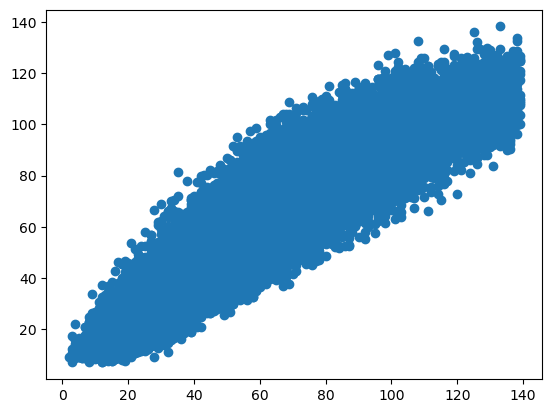

In [115]:
plt.scatter(y_test,Xg_predict)

In [116]:
pickle.dump(model,open('forecast_model.pkl','wb'))

In [117]:
pickled_model = pickle.load(open('forecast_model.pkl','rb'))

In [118]:
x_test

array([[ 0.87041723, -0.86603651,  1.05350549, -1.59580677, -0.62767803],
       [ 0.17343208, -0.31252485, -0.9917619 , -0.72831401, -0.62767803],
       [ 0.17343208, -0.58928068, -0.42363207, -0.43914976, -0.62767803],
       ...,
       [-1.22053821,  0.58693161,  0.14449776,  1.0066715 , -0.62767803],
       [-1.56903078, -1.07360339,  1.16713146, -1.01747826, -0.62767803],
       [-0.87204564,  1.27882119, -0.53725804, -0.72831401, -0.62767803]])

In [119]:
pickled_model.predict(x_test)

array([66.91818 , 29.043985, 26.190596, ..., 31.225964, 58.409935,
       33.826675], dtype=float32)